## Basic Text Analytics Example

The goal is to extract the text content and then perform text processing and analysis to identify and visualize the co-occurrence of the keywords. 
This example shows how to create a co-occurrence network using a bag-of-words model


Given a corpus of documents, a co-occurrence network is an undirected graph, with nodes corresponding to unique words in a vocabulary and edges corresponding to the frequency of words co-occurring in a document. Use co-occurrence networks to visualize and extract information of the relationships between words in a corpus of documents. For example, you can use a co-occurrence network to discover which words commonly appear with a specified word. This process will take a few steps

Analysis of text generally follows the standard approach applied to other types of data.

- Extraction
- preprocessing
 - split into sentences (basic building blocks of text)
 - tokenize the text (tokens individual character units)
 - filtering (remove stopwords, convert to base form)
- statistical analysis
   - tokens counting, frequency of occurrence 
   - co-occurrences: locations of the keywords in the text and identify when two keywords appear close to each other.
- visualization
   - co-occurrence matrix
   - word association networksk.

In [20]:
import re

filename = "text_abstract.txt"

filename = "weekend_updates.txt"

filename = "question.txt"

with open(filename, 'r', encoding='utf-8') as file:
    text_data = file.read()

# Pattern to match a word character followed by . ! or ? and then a space
pattern = r'\w[.!?]\s'

# Split the text into sentences
text_data = re.split(pattern, text_data)

# Replace commas, colons, semicolons, parentheses with an empty string
text_data = [re.sub(r'[,:;)(]', '', sentence) for sentence in text_data]

# Convert to string array (list in Python)
text_data = [str(sentence) for sentence in text_data]

# Display the sentences
print(text_data)

np.size(text_data)



["To be or not to be that is the question\nWhether 'tis nobler in the mind to suffer\nThe slings and arrows of outrageous fortune\nOr to take arms against a sea of troubles\nAnd by opposing end the", "To die—to sleep\nNo more and by a sleep to say we end\nThe heart-ache and the thousand natural shocks\nThat flesh is heir to 'tis a consummation\nDevoutly to be wish'", "To die to sleep\nTo sleep perchance to dream—ay there's the rub\nFor in that sleep of death what dreams may come\nWhen we have shuffled off this mortal coil\nMust give us pause—there's the respect\nThat makes calamity of so long lif", "For who would bear the whips and scorns of time\nTh'oppressor's wrong the proud man's contumely\nThe pangs of dispriz'd love the law's delay\nThe insolence of office and the spurns\nThat patient merit of th'unworthy takes\nWhen he himself might his quietus make\nWith a bare bodki", "Who would fardels bear\nTo grunt and sweat under a weary life\nBut that the dread of something after death\nT

6

In [21]:
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Assuming text_data is a list of sentences as from the previous code
# Tokenizing each sentence into words
documents = [word_tokenize(sentence.lower()) for sentence in text_data]

# Set of English stopwords
stop_words = set(stopwords.words('english'))

# Removing stopwords and punctuation
documents = [[word for word in document if word not in stop_words and word not in string.punctuation] for document in documents]

# Display the documents
for document in documents:
    print(document)



['question', 'whether', "'t", 'nobler', 'mind', 'suffer', 'slings', 'arrows', 'outrageous', 'fortune', 'take', 'arms', 'sea', 'troubles', 'opposing', 'end']
['die—to', 'sleep', 'sleep', 'say', 'end', 'heart-ache', 'thousand', 'natural', 'shocks', 'flesh', 'heir', "'t", 'consummation', 'devoutly', 'wish']
['die', 'sleep', 'sleep', 'perchance', 'dream—ay', "'s", 'rub', 'sleep', 'death', 'dreams', 'may', 'come', 'shuffled', 'mortal', 'coil', 'must', 'give', 'us', 'pause—there', "'s", 'respect', 'makes', 'calamity', 'long', 'lif']
['would', 'bear', 'whips', 'scorns', 'time', "th'oppressor", "'s", 'wrong', 'proud', 'man', "'s", 'contumely', 'pangs', 'dispriz', "'d", 'love', 'law', "'s", 'delay', 'insolence', 'office', 'spurns', 'patient', 'merit', "th'unworthy", 'takes', 'might', 'quietus', 'make', 'bare', 'bodki']
['would', 'fardels', 'bear', 'grunt', 'sweat', 'weary', 'life', 'dread', 'something', 'death', 'undiscovere', "'d", 'country', 'whose', 'bourn', 'traveller', 'returns', 'puzzles'

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

# Joining the tokens back into strings for each document
documents_joined = [" ".join(doc) for doc in documents]

# Initializing the CountVectorizer
vectorizer = CountVectorizer()

# Fitting the model and transforming the data
X = vectorizer.fit_transform(documents_joined)

# Getting the feature names (words)
features = vectorizer.get_feature_names_out()

# Getting the counts for each word in each document
counts = X.toarray()

# Display the feature names and counts
print(features)
print(counts)


['ache' 'action' 'arms' 'arrows' 'awry' 'ay' 'bare' 'bear' 'bodki' 'bourn'
 'calamity' 'cast' 'coil' 'come' 'conscience' 'consummation' 'contumely'
 'country' 'cowards' 'currents' 'death' 'delay' 'devoutly' 'die' 'dispriz'
 'doth' 'dread' 'dream' 'dreams' 'end' 'enterprises' 'er' 'fardels'
 'flesh' 'fly' 'fortune' 'give' 'great' 'grunt' 'heart' 'heir' 'hue'
 'ills' 'insolence' 'know' 'law' 'lif' 'life' 'long' 'lose' 'love' 'make'
 'makes' 'man' 'may' 'merit' 'might' 'mind' 'moment' 'mortal' 'must'
 'name' 'native' 'natural' 'nobler' 'office' 'opposing' 'oppressor'
 'others' 'outrageous' 'pale' 'pangs' 'patient' 'pause' 'perchance' 'pith'
 'proud' 'puzzles' 'question' 'quietus' 'rather' 'regard' 'resolution'
 'respect' 'returns' 'rub' 'say' 'scorns' 'sea' 'shocks' 'shuffled'
 'sicklied' 'sleep' 'slings' 'something' 'spurns' 'suffer' 'sweat' 'take'
 'takes' 'th' 'there' 'thought' 'thousand' 'thus' 'time' 'to' 'traveller'
 'troubles' 'turn' 'undiscovere' 'unworthy' 'us' 'weary' 'whether' 

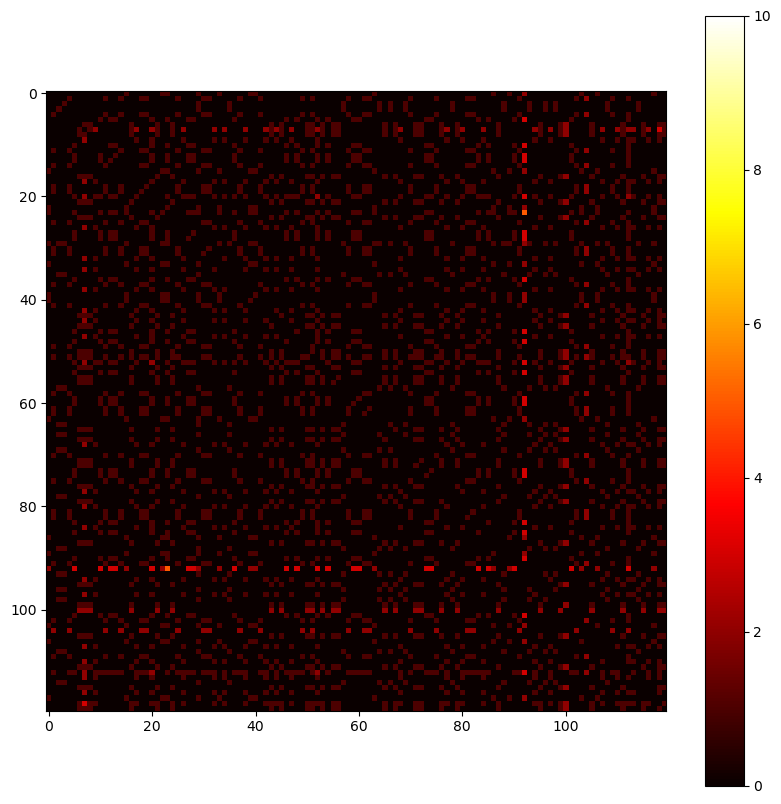

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the co-occurrence matrix
cooccurrence = np.dot(counts.T, counts)

# Subtract the diagonal values (to remove self-co-occurrences)
np.fill_diagonal(cooccurrence, 0)

# Plotting the co-occurrence matrix
plt.figure(figsize=(10, 10))
img = plt.imshow(cooccurrence, cmap='hot', interpolation='nearest')
img.set_clim([0, 10])
plt.colorbar()
plt.show()


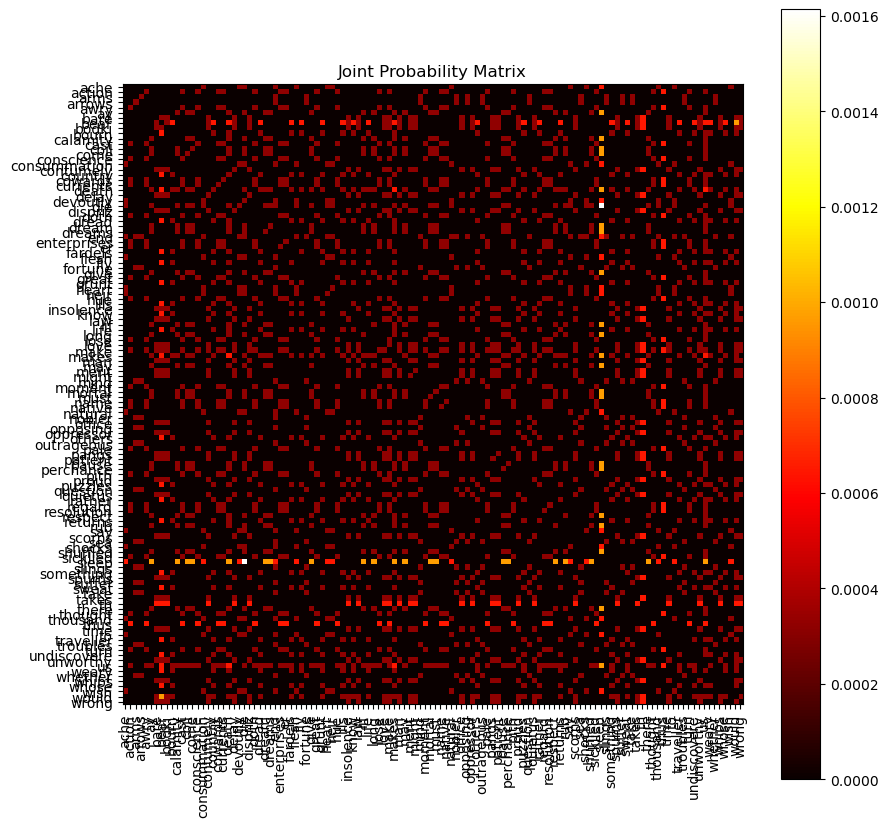

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Probability of each word
word_prob = np.sum(cooccurrence, axis=1) / np.sum(cooccurrence)

# Joint probability matrix
joint_prob_matrix = cooccurrence / np.sum(cooccurrence)

# Plotting the joint probability matrix
plt.figure(figsize=(10, 10))
plt.imshow(joint_prob_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()

# Setting the tick labels
vocab_list = list(features)
plt.xticks(ticks=np.arange(len(vocab_list)), labels=vocab_list, rotation=90)
plt.yticks(ticks=np.arange(len(vocab_list)), labels=vocab_list)

plt.title("Joint Probability Matrix")
plt.show()


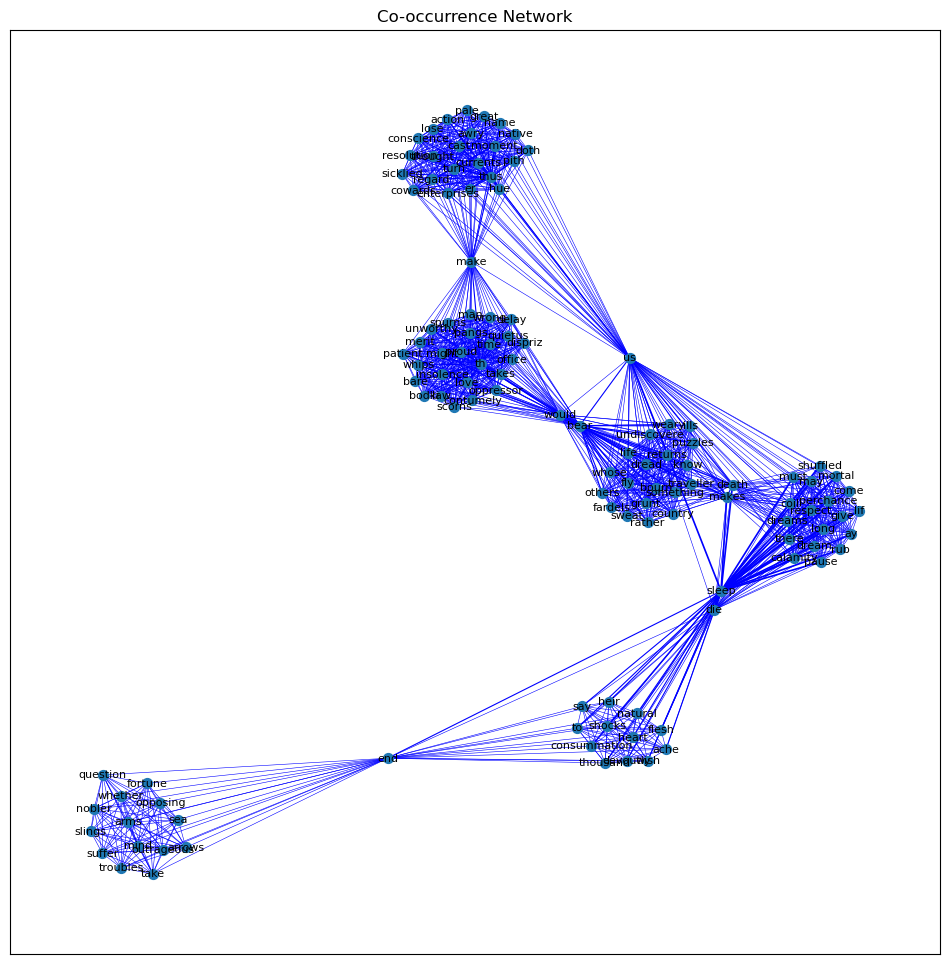

In [25]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph from the co-occurrence matrix
G = nx.from_numpy_array(cooccurrence)

# Relabel nodes to correspond to the bag of words vocabulary
mapping = {node: word for node, word in zip(G.nodes(), features)}
G = nx.relabel_nodes(G, mapping)

# Calculate line widths relative to the maximum weight
weights = nx.get_edge_attributes(G, 'weight')
max_weight = max(weights.values())
LWidths = [2 * weights[edge] / max_weight for edge in G.edges()]

# Draw the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)  # Positioning the nodes of the graph
nx.draw_networkx(G, pos, width=LWidths, node_size=50, edge_color='blue', font_size=8, with_labels=True)
plt.title("Co-occurrence Network")
plt.show()


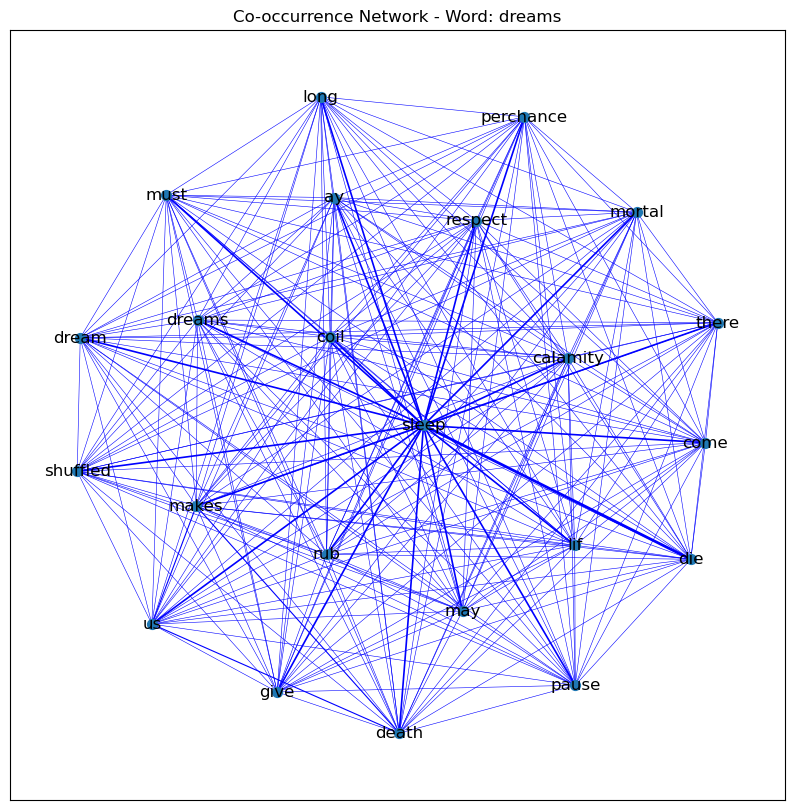

In [26]:
# Find the node for the given word
word = 'dreams'
if word in G:
    # Find neighbors of the word
    nbrs = list(G.neighbors(word))
    
    # Subgraph containing the word and its neighbors
    sub_nodes = [word] + nbrs
    H = G.subgraph(sub_nodes)
    
    # Calculate line widths for the subgraph, proportional to the edge weights
    sub_weights = nx.get_edge_attributes(H, 'weight')
    max_sub_weight = max(sub_weights.values(), default=1)
    LWidths = [2 * sub_weights[edge] / max_sub_weight for edge in H.edges()]
    
    # Draw the subgraph
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(H)  # Positioning the nodes of the graph
    nx.draw_networkx(H, pos, width=LWidths, node_size=50, edge_color='blue', font_size=12, with_labels=True)
    plt.title(f"Co-occurrence Network - Word: {word}")
    plt.show()
else:
    print(f"Word '{word}' not found in the vocabulary.")
